In [1]:
from dotenv import load_dotenv
import os
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

In [2]:
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
import requests

llm = ChatOpenAI(
    openai_api_base="https://router.huggingface.co/v1",
    openai_api_key=api_key,
    model_name="openai/gpt-oss-120b:cerebras",
)

llm.invoke("who's pm of pakistan? answer just the name").content

'Anwar\u202ful\u202fHaq\u202fKakar'

In [10]:
from typing import TypedDict
class Joke(TypedDict):
    query: str
    joke_generated: str
    joke_rating: int

In [11]:
def generate_joke(query: str):
    response = llm.invoke(f"Generate a joke about {query}\n joke must NOT be long").content
    return {"joke_generated": response}

def rate_joke(joke_generated: str):
    response = llm.invoke(f"Rate the following joke on a scale of 1 to 10: {joke_generated}\n Your answer should ONLY contain the rating number nothing else").content
    return {"joke_rating": int(response)}

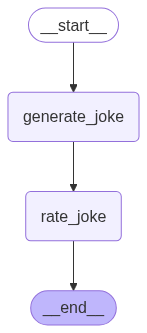

In [17]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver

workflow = StateGraph(Joke)

workflow.add_node("generate_joke", generate_joke)
workflow.add_node("rate_joke", rate_joke)

workflow.add_edge(START, "generate_joke")
workflow.add_edge("generate_joke", "rate_joke")
workflow.add_edge("rate_joke", END)

checkpointer = InMemorySaver()

graph = workflow.compile(checkpointer=checkpointer)
graph

In [18]:
config1 = {"configurable": {"thread_id": "1"}}

input = {"query": "Machine Learning"}
graph.invoke(input, config=config1)

{'query': 'Machine Learning',
 'joke_generated': "Why don't machine learning models ever get cold?  \nThey always have a lot of layers!",
 'joke_rating': 7}

In [ ]:
# graph.get_state(config1)


StateSnapshot(values={'query': 'Machine Learning', 'joke_generated': "Why don't machine learning models ever get cold?  \nThey always have a lot of layers!", 'joke_rating': 7}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06fb6a-4f97-647d-8002-126f91bd53b8'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-02T15:37:49.102759+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06fb6a-17df-6a1d-8001-690f74e2bf1e'}}, tasks=(), interrupts=())

In [23]:
list(graph.get_state_history(config1))

[StateSnapshot(values={'query': 'Machine Learning', 'joke_generated': "Why don't machine learning models ever get cold?  \nThey always have a lot of layers!", 'joke_rating': 7}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06fb6a-4f97-647d-8002-126f91bd53b8'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-02T15:37:49.102759+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06fb6a-17df-6a1d-8001-690f74e2bf1e'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'query': 'Machine Learning', 'joke_generated': "Why don't machine learning models ever get cold?  \nThey always have a lot of layers!"}, next=('rate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06fb6a-17df-6a1d-8001-690f74e2bf1e'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-02T15:37:43.26036